### 1. Setup Google Cloud Project and Service Account

To interact with Google Sheets programmatically, you'll need to set up a Google Cloud Project and create a Service Account. This service account will act as your program's identity when accessing Google APIs.

**Steps:**

1.  **Go to Google Cloud Console:** Navigate to [console.cloud.google.com](https://console.cloud.google.com/).
2.  **Create a New Project:** If you don't have one, create a new project.
3.  **Enable Google Sheets API:**
    *   In the console, go to "APIs & Services" > "Library."
    *   Search for "Google Sheets API" and enable it.
4.  **Create a Service Account:**
    *   Go to "APIs & Services" > "Credentials."
    *   Click "CREATE CREDENTIALS" > "Service account."
    *   Follow the prompts to create the account. Grant it a role like "Project" > "Viewer" or a more specific role if you know it, though for Sheets access, you'll primarily grant access via sharing the sheet itself with the service account's email.
    *   **Crucially**, when creating the service account, select the option to "Create key" (JSON format). Download this JSON file; it contains your service account's credentials.
5.  **Share your Google Sheet with the Service Account:** The service account has an email address (you can find it in the "Credentials" section). Share the specific Google Sheet you want to access with this email address, just as you would share it with another person, granting appropriate permissions (e.g., Editor).

### 2. Install the `gspread` Library

In [9]:
pip install gspread --upgrade gspread gspread-dataframe

### 3. Authenticate and Interact with Google Sheets

Now, you'll use the JSON key file you downloaded to authenticate and interact with your Google Sheet. It's recommended to upload your `service_account.json` file to your Colab environment or store it securely.

**Note:** For security, avoid hardcoding the service account file path. In Colab, you can upload it to the session storage or mount Google Drive.

In [28]:
import gspread # for interacting with Google sheets API
import pandas as pd
from google.colab import auth # For Colab-specific authentication
import google.auth # Import google.auth to get default credentials

# Authenticate to Google Drive using Colab's built-in authentication
auth.authenticate_user()

# Get the authenticated credentials
credentials, project = google.auth.default()

# Authorize gspread with the authenticated credentials
gc = gspread.Client(auth=credentials)

# --- Replace 'Your Spreadsheet Name' with the actual name of your Google Sheet ---
# Make sure the service account's email has access to this sheet
spreadsheet = gc.open('Master')

# --- Select a worksheet by its name or index ---
# By name:
worksheet = spreadsheet.worksheet('raw_data')

# By index (0 for the first sheet):
# worksheet = spreadsheet.get_worksheet(0)

print(f"Successfully opened spreadsheet: {spreadsheet.title}")
print(f"Successfully selected worksheet: {worksheet.title}")

Successfully opened spreadsheet: Master
Successfully selected worksheet: raw_data


### 4. Basic Operations

In [30]:
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0]).drop(columns=['OLD_DATE','notes'], axis=1)

# Check everything looks right
print(df.columns.tolist())  # shows column names
print(df.shape)              # shows rows x columns
df.head()                    # shows first 5 rows

['date', 'merchant', 'amount', 'original_category', 'my_category', 'source']
(755, 6)


,date,merchant,amount,original_category,my_category,source
0,2025-02,JOHNNY DELMONICO'S,$434.92,Restaurants,Dining Out,Card1
1,2025-01,KWIK TRIP,$8.31,Gas / Fuel,Transportation,Bank2
2,2025-01,TARGET,$6.33,Shopping,Groceries,Bank2
3,2025-01,HAWKS BAR AND GRILL,$5.16,Dining Out,Dining Out,Bank2
4,2025-01,KWIK TRIP,$5.93,Gas / Fuel,Transportation,Bank2


In [35]:
print(df['my_category'].value_counts())
print(f"\nBlank categories: {df['my_category'].eq('').sum()}")

my_category
Dining Out        204
Transportation    146
Shopping          128
Groceries         108
Bills              55
Travel             55
Subscriptions      26
Entertainment      22
Withdrawal          7
Other               4
Name: count, dtype: int64

Blank categories: 0


In [37]:
# Total spending by month
monthly_summary = df.groupby('date')['amount'].sum().reset_index()
monthly_summary.columns = ['Month', 'Total Spent']
print(monthly_summary)

      Month  Total Spent
0   2025-01        38.71
1   2025-02      3842.51
2   2025-03      3743.83
3   2025-04      2700.03
4   2025-05      3156.71
5   2025-06      2580.88
6   2025-07      2752.91
7   2025-08      2376.69
8   2025-09      1992.85
9   2025-10      1545.48
10  2025-11      1590.12
11  2025-12      1826.79
12  2026-01      1316.49
13  2026-02       977.70


In [38]:
# Total spending by category
category_summary = df.groupby('my_category')['amount'].sum().sort_values(ascending=False).reset_index()
category_summary.columns = ['Category', 'Total Spent']
print(category_summary)

         Category  Total Spent
0           Bills     12303.62
1  Transportation      4775.40
2      Dining Out      4270.67
3        Shopping      4058.66
4       Groceries      2742.96
5          Travel      1097.91
6   Entertainment       576.64
7   Subscriptions       311.43
8      Withdrawal       286.83
9           Other        17.58


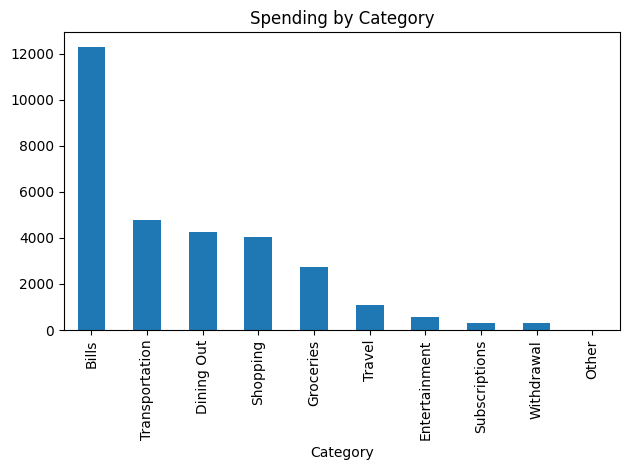

In [39]:
import matplotlib.pyplot as plt

# Bar chart - spending by category
category_summary.plot(kind='bar', x='Category', y='Total Spent',
                      title='Spending by Category', legend=False)
plt.tight_layout()
plt.show()

This covers the basics of connecting to Google Sheets and performing read/write operations. The `gspread` library offers many more functionalities for advanced interactions.